In [12]:
# %pip install pennylane
# %pip install tqdm

In [1]:
import numpy as np
import pennylane as qml
from pennylane import numpy as pnp
import matplotlib.pyplot as plt
from tqdm import tqdm, trange

Discretize the interval [0, 2π]

In [2]:
num_points = 10
x_values = np.linspace(0, 2 * np.pi, num_points)
y_values = np.sin(x_values)

Define the number of qubits and layers

In [3]:
num_qubits = 1
num_layers = 3

Create a device

In [4]:
dev = qml.device("default.qubit", wires=num_qubits)

Define the variational quantum circuit

In [5]:
@qml.qnode(dev)
def quantum_circuit(params, x):
    qml.RX(x, wires=0)
    for i in range(num_layers):
        qml.RY(params[i], wires=0)
        qml.RZ(params[i + num_layers], wires=0)
    return qml.expval(qml.PauliZ(0))

Initialize the parameters

In [6]:
params = pnp.random.random(2 * num_layers, requires_grad=True)

Define the Cost Function

In [7]:
def cost(params, x_values, y_values):
    predictions = [quantum_circuit(params, x) for x in x_values]
    return pnp.mean((pnp.array(predictions) - y_values) ** 2)

Train the Model

In [8]:
# Choose an optimizer
opt = qml.GradientDescentOptimizer(stepsize=0.1)

# Number of training iterations
num_iterations = 10

for epoch in trange(num_iterations, desc="Training Progress", unit="epoch"):
    pbar = tqdm(enumerate(x_values), total=len(x_values), desc=f"Epoch {epoch+1}/{num_iterations}", unit="batch")
    for step, x in pbar:
        params, cost_val = opt.step_and_cost(lambda v: cost(v, x_values, y_values), params)
        pbar.set_postfix(cost=cost_val)
    pbar.close()

    if epoch % 10 == 0:
        print(f"Epoch {epoch}: Cost = {cost_val}")

print("Training complete!")

Training Progress:  10%|█         | 1/10 [00:01<00:10,  1.15s/epoch]

Epoch 0: Cost = 0.5257818361259641


Training Progress: 100%|██████████| 10/10 [00:11<00:00,  1.17s/epoch]

Training complete!


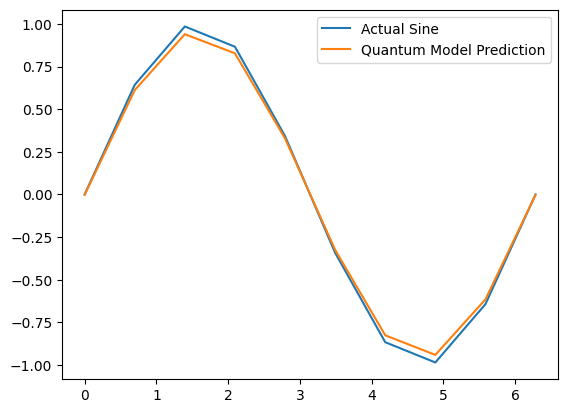

In [11]:

# Get the predictions
predictions = [quantum_circuit(params, x) for x in x_values]

# Plot the results
plt.plot(x_values, y_values, label="Actual Sine")
plt.plot(x_values, predictions, label="Quantum Model Prediction")
plt.legend()
plt.show()